# Puzzle

https://thefiddler.substack.com/p/how-much-does-game-1-matter

### This Week’s Fiddler

You and your opponent are beginning a best-of-seven series, meaning the first team to win four games wins the series. Both teams are evenly matched, meaning each team has a 50 percent chance of winning each game, independent of the outcomes of previous games.

As the team manager, you are trying to motivate your team as to the criticality of the first game in the series (i.e., “Game 1”). You’d specifically like to educate them regarding the “probability swing” coming out of Game 1—that is, the probability of winning the series if they win Game 1 minus the probability of winning the series if they lose Game 1. (For example, the probability swing for a winner-take-all Game 7 is 100 percent.)

What is the probability swing for Game 1?

### This Week’s Extra Credit

Instead of a best-of-seven series, now suppose the series is much, much longer. In particular, the first team to win N games wins the series, so technically this is a best-of-(2N−1) series, where N is some very, very large number.

In the limit of large N, what is the probability swing for Game 1 in terms of N? (For full credit, I’m expecting an answer that is rather concise!)


# Fiddler Solution

It simplifies the analysis to think that all 7 games are played, even if the result is decided earlier.

After Game 1 is played, there are 7 possible outcomes for the remaining 6 games (you win 0 .. you win all 6). In the event that these 6 games are tied 3-3, Game 1 acts as a tie-breaker, but otherwise Game 1 outcome does not matter.

Probability Swing = (Probability You Win 3,4,5,6 in last 6) - (Probability you win 0,1,2 in last 6).

Because of the symmetry, the 4/5/6 terms cancel out with the 2/1/0 terms, and we get

Probability Swing = Probability of a 3-3 result in the last 6.

Now, this is easier to calculate. 

Any specific sequence of wins and losses (e.g. WLWLWW) has probability $\frac{1}{2^6}$ because each Win and Loss has prob $\frac{1}{2}$.

And there are ${6 \choose 3}$ ways of distributing the 3 wins.

So, Probability Swing 

= $ {6 \choose 3} \times \frac{1}{2^6}$

= $\frac{20}{64}$

= $\frac{5}{16}$

= 0.3125

# Extra Credit Solution

Following similar reasoning as the fiddler, the probability swing after the first game will correspond to the probability of a tie in the final 2N-2 games.

Probability Swing

= $ {{2N-2} \choose {N-1}} \times \frac{1}{2^{2N-2}} $

= $ \frac{(2N-2)!}{({N-1})!({N-1})!} \times \frac{1}{2^{2N-2}} $

= $ \frac{(2N-2)!}{(({N-1})!)^2} \times \frac{1}{2^{2N-2}} $

This is a good time to define $M = N-1$ and use that.

= $ \frac{(2M)!}{(M!)^2} \times \frac{1}{2^{2M}} $  // Exact


To find the limiting expression for this, we can use [Stirling's Approximation](https://en.wikipedia.org/wiki/Stirling%27s_approximation): $K! =~ \sqrt{2 \pi K} (\frac{K}{e})^K$

=~ $ \frac{ \sqrt{2 \pi 2M} (\frac{2M}{e})^{2M} }{( \sqrt{2 \pi M} (\frac{M}{e})^M )^2} \times \frac{1}{2^{2M}} $

= $ \frac{ 2 \sqrt{\pi M} (\frac{2M}{e})^{2M} }{2 \pi M (\frac{M}{e})^{2M} } \times \frac{1}{2^{2M}} $

= $ \frac{1}{\sqrt{\pi M}} \times (\frac{\frac{2M}{e}}{\frac{M}{e}})^{2M} \times \frac{1}{2^{2M}} $

= $ \frac{1}{\sqrt{\pi M}} \times 2^{2M} \times \frac{1}{2^{2M}} $

= $ \frac{1}{\sqrt{\pi M}} $

= $ \frac{1}{\sqrt{\pi (N-1)}} $   // Stirling High

=~ $ \frac{1}{\sqrt{\pi N}} $   // Stirling Low

### Consistency Check.

If we use the final Extra Credit formula for the Fiddler case, we get $ \frac{1}{\sqrt{4 \pi}} = 0.2821 $ 

If we use the slightly more exact formula from the previous line for the Fiddler case, we get $ \frac{1}{\sqrt{3 \pi}} = 0.3257 $.

Both of these are close to the true answer of 0.3125. And it is nice to observe that the right answer is in between the two.

### Aside - Gosper

[This mathworld article about Stirling's Approximation](https://mathworld.wolfram.com/StirlingsApproximation.html) has this more accurate approximation: $K! =~ \sqrt{(2K + \frac{1}{3}) \pi} (\frac{K}{e})^K$. If we use this instead, we would get 

Probability Swing

= $ \frac{1}{\sqrt{\pi}} \times \frac{\sqrt{4M + \frac{1}{3}}}{2M + \frac{1}{3}} $

= $ \frac{1}{\sqrt{\pi}} \times \frac{\sqrt{4N - 4 + \frac{1}{3}}}{2N - 2 + \frac{1}{3}} $

= $ \frac{1}{\sqrt{\pi}} \times \frac{\sqrt{4N - 3\frac{2}{3}}}{2N - 1\frac{2}{3}} $ // Gosper

# Plots

In [2]:
from math import pi, sqrt, comb
def swing_exact(N):
    M = N - 1
    return comb(2*M, M) / (2 ** (2 * M))

def swing_stirling_high(N):
    M = N - 1
    return 1/sqrt(pi * M)

def swing_stirling_low(N):
    return 1/sqrt(pi * N)

def swing_gosper(N):
    M = N - 1
    return (1/sqrt(pi)) * (sqrt(4*M + (1/3)) / (2*M + (1/3)))

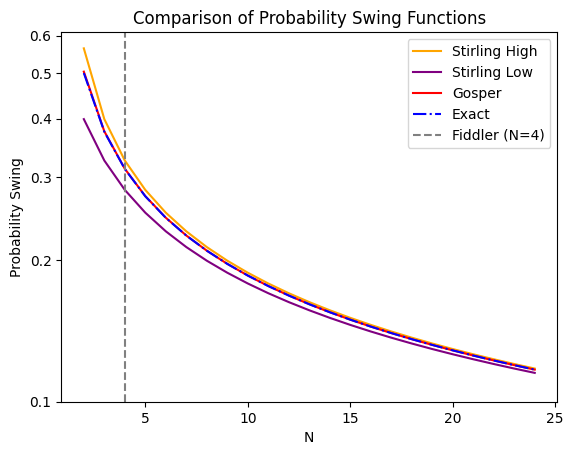

In [32]:
import matplotlib.pyplot as plt

N_values = range(2, 25)
exact_values = [swing_exact(N) for N in N_values]
stirling_high_values = [swing_stirling_high(N) for N in N_values]
stirling_low_values = [swing_stirling_low(N) for N in N_values]
gosper_values = [swing_gosper(N) for N in N_values]

plt.plot(N_values, stirling_high_values, label="Stirling High", color="orange")
plt.plot(N_values, stirling_low_values, label="Stirling Low", color="purple")
plt.plot(N_values, gosper_values, label="Gosper", color="red", linestyle="-")
plt.plot(N_values, exact_values, label="Exact", color="blue", linestyle="-.")
plt.axvline(x=4, label='Fiddler (N=4)', color='gray', linestyle='--')
plt.legend()
plt.xlabel("N")
plt.ylabel("Probability Swing")
plt.title("Comparison of Probability Swing Functions")
plt.yscale('log')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6'])
plt.show()

# Conclusions

Fiddler Answer = 5/16 = 0.3125

Extra Credit Exact Answer = $ \frac{(2N-2)!}{(({N-1})!)^2} \times \frac{1}{2^{2N-2}} $

Extra Credit Most Concise Approximate Answer = $ \frac{1}{\sqrt{\pi N}} $

Gosper's approximation is surprisingly accurate, but not as concise.